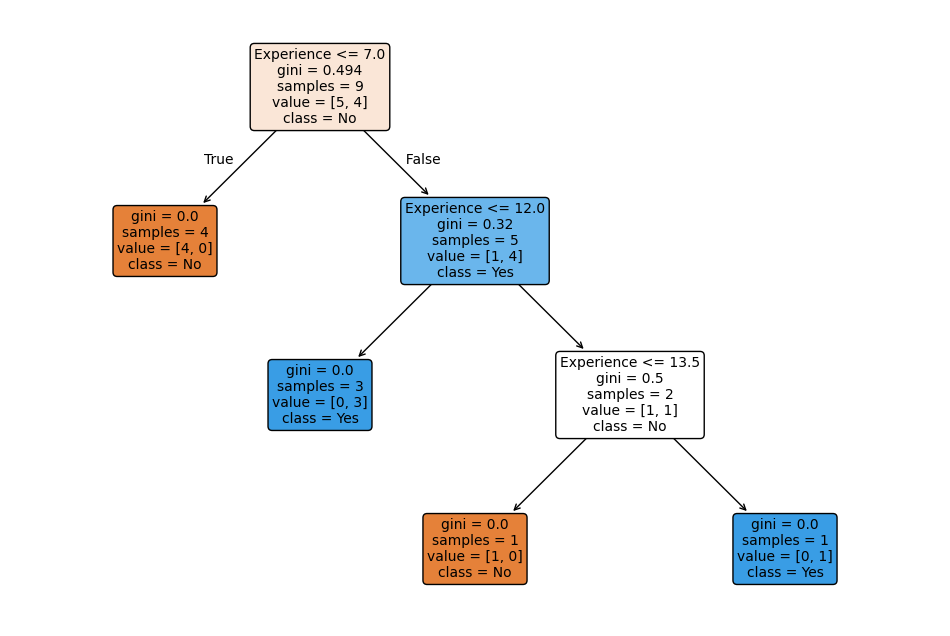

|--- Experience <= 7.00
|   |--- class: 0
|--- Experience >  7.00
|   |--- Experience <= 12.00
|   |   |--- class: 1
|   |--- Experience >  12.00
|   |   |--- Experience <= 13.50
|   |   |   |--- class: 0
|   |   |--- Experience >  13.50
|   |   |   |--- class: 1



In [12]:
import pandas
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pandas.read_csv("TempData.csv")

# Map categorical data in the 'Nationality' column to numerical values
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

# Map categorical data in the 'Go' column to numerical values
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

# Define the features (input variables) and target variable
features = ['Age', 'Experience', 'Rank', 'Nationality']  # Columns to be used as features
X = df[features]  # Input features
y = df['Go']  # Target variable

# Initialize the decision tree classifier
dtree = DecisionTreeClassifier()

# Fit the decision tree classifier on the data
dtree = dtree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the size of the plot
plot_tree(
    dtree, 
    feature_names=features,  # Display feature names
    class_names=['No', 'Yes'],  # Display class names for target variable
    filled=True,  # Fill nodes with colors representing the classes
    rounded=True,  # Use rounded corners for the boxes
    fontsize=10  # Set font size
)
plt.show()  # Show the plot

# Print a textual representation of the decision tree
print(export_text(dtree, feature_names=features))




In [14]:
# Load the dataset
df = pandas.read_csv("poker-hand-training-true.csv")

# Define the features and target
features = ["S1", "R1", "S2", "R2", "S3", "R3", "S4", "R4", "S5", "R5"]
X_train = df[features]  # Features from training data
y_train = df["Class"]  # Target from training data

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print(f"Tree Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")

Tree Depth: 30
Number of Leaves: 9196


## Decision Tree Training Results

### Tree Structure
- **Tree Depth**: 30  
  - The depth of the tree is the longest path from the root node to a leaf node.  
  - A depth of 30 indicates that the tree has grown very deep, creating a highly detailed set of rules for classification.  
  - While this might improve training accuracy, it can lead to **overfitting**, where the model memorizes the training data instead of generalizing patterns.

- **Number of Leaves**: 9196  
  - Leaves are the terminal nodes in the tree where predictions are made.  
  - The tree has 9196 leaves, which suggests it has created a large number of distinct rules to classify the data.  
  - While this level of complexity is expected for a dataset like Poker Hands (due to the many combinations of suits and ranks), it could also indicate **overfitting**.

  ### Addressing Overfitting
To prevent overfitting and improve the model's generalization ability:
1. **Limit the Depth of the Tree**:
   - Restrict the maximum depth of the tree to control its complexity

2. **Limit the Minimum Samples per Leaf**:
   - Set a minimum number of samples required for a leaf node

3. **Prune the Tree**:
   - Use cost-complexity pruning (`ccp_alpha`) to remove overly specific splits


In [13]:
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10,  max_depth=10) # Added cap on depth and minimum samples per leaf
model.fit(X_train, y_train)
print(f"Tree Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")

Tree Depth: 10
Number of Leaves: 684


In [15]:
from sklearn.metrics import accuracy_score

# Get the effective alpha values for pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Display alpha values and corresponding tree impurities
print("Effective Alphas:", ccp_alphas)
print("Impurities for each alpha:", impurities)

Effective Alphas: [0.00000000e+00 2.13248034e-05 2.33240037e-05 ... 3.76798757e-04
 3.81341428e-04 4.36344364e-04]
Impurities for each alpha: [0.00000000e+00 6.39744102e-05 1.33946421e-04 ... 5.63369749e-01
 5.63751091e-01 5.68114534e-01]


## Cost Complexity Pruning Results

### Effective Alphas (`ccp_alpha`)
- **Definition**: 
  - The `ccp_alpha` values represent thresholds for pruning the decision tree.
  - Each alpha controls the pruning strength, where larger values prune more nodes, simplifying the tree.
- **Values**:
  - Example values from the dataset:
    ```
    [0.00000000e+00, 2.13248034e-05, 2.33240037e-05, ..., 
     3.76798757e-04, 3.81341428e-04, 4.36344364e-04]
    ```
  - The range begins at `0.00000000e+00` (no pruning) and increases to `4.36344364e-04` (high pruning).

### Impurities for Each Alpha
- **Definition**: 
  - Impurities represent the total impurity (e.g., Gini) of the tree for a given `ccp_alpha`.
  - As pruning increases, the impurity rises because the tree becomes simpler and less specialized.
- **Values**:
  - Example impurity values:
    ```
    [0.00000000e+00, 6.39744102e-05, 1.33946421e-04, ..., 
     5.63369749e-01, 5.63751091e-01, 5.68114534e-01]
    ```
  - At `ccp_alpha = 0.00000000e+00`, the tree is fully grown with no impurity.
  - As `ccp_alpha` increases, the impurity grows, reflecting the tree's simplification.

---

### Interpreting the Results
1. **Alpha Values (`ccp_alpha`)**:
   - **Low Alpha (`0.00000000e+00`)**:
     - The tree is fully grown, with no pruning applied.
     - It likely overfits the training data, resulting in perfect accuracy but poor generalization.
   - **Moderate Alpha (`2.13248034e-05` to `3.81341428e-04`)**:
     - Nodes with minimal contributions to impurity reduction are pruned.
     - The tree becomes simpler, balancing training accuracy and generalization.
   - **High Alpha (`4.36344364e-04`)**:
     - The tree is heavily pruned, with fewer nodes and high impurity.
     - It may underfit the data, leading to poor performance on both training and test sets.

2. **Impurity Values**:
   - **Low Impurity (`0.00000000e+00`)**:
     - At low `ccp_alpha`, the tree is fully grown and fits the training data perfectly.
   - **High Impurity (`5.68114534e-01`)**:
     - At high `ccp_alpha`, the tree is simplified to the point of underfitting, where it lacks the complexity needed to represent the data accurately.


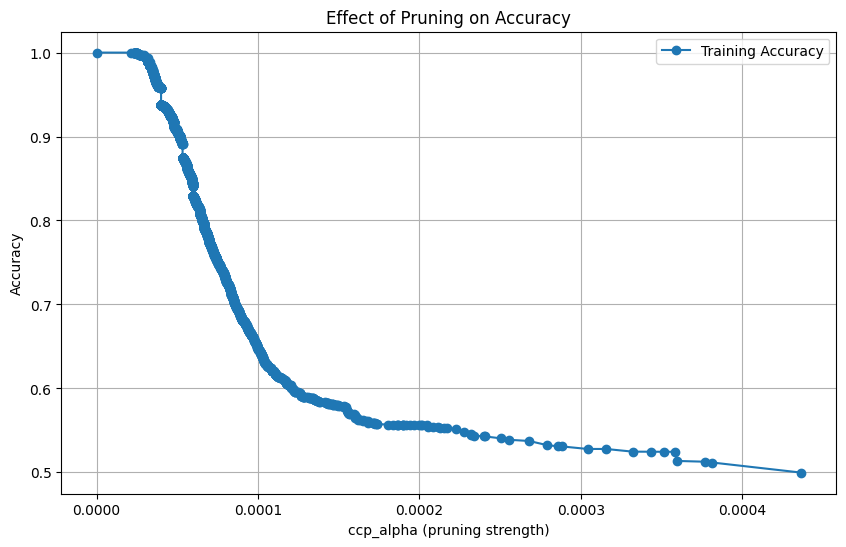

In [16]:
# Train models for each alpha
models = []
train_scores = []

for alpha in ccp_alphas:
    # Train a new tree for each alpha
    pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_model.fit(X_train, y_train)
    models.append(pruned_model)
    
    # Evaluate on training
    train_scores.append(pruned_model.score(X_train, y_train))

# Plot accuracy vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Training Accuracy", marker='o')
plt.xlabel("ccp_alpha (pruning strength)")
plt.ylabel("Accuracy")
plt.title("Effect of Pruning on Accuracy")
plt.legend()
plt.grid()
plt.show()

## Understanding `ccp_alpha` Values for Pruning

### What is `ccp_alpha`?
- **`ccp_alpha`**: A hyperparameter that determines the strength of pruning applied to the decision tree.
- Higher values of `ccp_alpha` prune more nodes from the tree, simplifying its structure.

### What These Numbers Mean
Each value in the array represents a pruning threshold (alpha). As `ccp_alpha` increases:
1. The decision tree removes nodes that add less value to reducing impurity.
2. The tree becomes progressively smaller and simpler.

Example of alpha values:

4.36189161e-06, 6.05818279e-06, 9.79694702e-06, 1.19952019e-05, 
1.19952019e-05, 1.40706181e-05, 1.46608023e-05, 1.53877843e-05, 
1.53885814e-05, 1.56820389e-05, 1.58302950e-05, 1.59936026e-05, 
1.59936026e-05, 1.61147662e-05, 1.72398573e-05, 1.86592030e-05, 
1.87822307e-05, 1.91842455e-05, 1.95178845e-05, 1.99400759e-05

#### Interpreting the Example Set
- **Range**: The values start very small and gradually increase, indicating incremental steps for pruning strength.
- **Magnitude**: The values are small because they represent minimal changes in impurity reduction at each pruning step.

### Why These Values Matter
1. **Tree Impurity vs. Complexity**: Each alpha value corresponds to a tree with a specific impurity level and number of nodes.
2. **Choosing the Optimal Alpha**: The goal is to find the **smallest alpha** that maximizes test accuracy without overfitting the training data.

### Observations from the Pruning Plot

The pruning plot with training accuracy only shows a line starting at 1.0, slowly declining, then dropping sharply to around 0.6, and then gradually descending to 0.5. Here’s what this means:

- **Initial High Accuracy**: At very low `ccp_alpha` values, the tree is highly complex and overfitted, achieving nearly perfect accuracy on training data.
- **Sharp Drop**: As `ccp_alpha` increases, significant pruning begins, and the model starts losing accuracy on the training set, indicating it’s simplifying and removing overfitted details.
- **Gradual Decline to 0.5**: At high `ccp_alpha` values, the tree becomes very shallow, resulting in underfitting, where it lacks complexity to capture patterns in the training data.


In [19]:
# Load test data
test_data = pandas.read_csv("poker-hand-testing.csv")

# Define features and target for test data
X_test = test_data[features]
y_test = test_data["Class"]

# Initialize lists for storing accuracies
train_scores = []
test_scores = []

# Train and evaluate the tree for each alpha
for alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_model.fit(X_train, y_train)
    
    # Record training and test accuracy
    train_scores.append(pruned_model.score(X_train, y_train))
    test_scores.append(pruned_model.score(X_test, y_test))

    # Plot training and test accuracy vs. pruning strength
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Training Accuracy", marker='o')
plt.plot(ccp_alphas, test_scores, label="Test Accuracy", marker='o')
plt.xlabel("ccp_alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Pruning Strength")
plt.legend()
plt.grid()
plt.show()

KeyError: "['R5'] not in index"